In [1]:
import random

class Node: 
    def __init__(self, key, parent = None): 
        self.key = key
        self.parent = parent 
        self.left = None  
        self.right = None
        
        if parent != None:
            if key < parent.key:
                assert (parent.left == None), 'parent already has a left child -- unable to create node'
                parent.left = self
            else: 
                assert key > parent.key, 'key is the same as parent.key. We do not allow duplicate keys in a BST since it breaks some of the algorithms.'
                assert (parent.right == None), 'parent already has a right child -- unable to create node'
                parent.right = self

    def get_leftmost_descendant(self):
        if self.left != None:
            return self.left.get_leftmost_descendant()
        else:
            return self

    def search(self, key):
        if self.key == key: 
            return (True, self)
        elif key < self.key:
            if self.left != None:
                return self.left.search(key)
            else:
                return (False, self)
        elif key > self.key:
            if self.right != None:
                return self.right.search(key)
            else:
                return (False, self)
    
    def insert(self, key):
        (found, parent) = self.search(key)
        if found:
            return (None, print("Key already exists"))
        else:
            new_node = Node(key, parent)
            return new_node
    
    def height(self):
        if self.left is None and self.right is None:
            return 1
        elif self.left is None:
            return 1 + self.right.height()
        elif self.right is None:
            return 1 + self.left.height()
        else:
            return 1 + max(self.left.height(), self.right.height())
    
    # function to replace a node with its child or none (to be used in delete)
    def replace_node(self, new_node=None):
        if self.parent != None:
            if self.parent.left == self:
                self.parent.left = new_node
            else:
                self.parent.right = new_node
        if new_node != None:
            new_node.parent = self.parent

    # function to find the successor/leftMost descendent (node with smallest key in the right subtree) (to be used in delete)
    def find_successor(self):
        current = self.right
        while current.left != None:
            current = current.left
        return current
    
    def delete(self, key):
        (found, node_to_delete) = self.search(key)
        assert(found == True), f"key to be deleted:{key}- does not exist in the tree"
        
        if not found:
            return  print("Key not found, nothing to delete")

        # Case 1: Node has no children
        if node_to_delete.left == None and node_to_delete.right == None:
            node_to_delete.replace_node(None)

        # Case 2: Node has one child
        elif node_to_delete.left == None or node_to_delete.right == None:
            if node_to_delete.left != None:
                node_to_delete.replace_node(node_to_delete.left)
            else:
                node_to_delete.replace_node(node_to_delete.right)

        # Case 3: Node has two children
        else:
            successor = node_to_delete.find_successor()
            node_to_delete.key = successor.key
            successor.delete(successor.key)

# Weekly Task

# 1. make list of  numbers from 0 to n-1
# 2. randomly shuffle the list
# 3. insert the random list elements in order into a tree.
# 4. return the height of the resulting ree.
def run_single_experiment(n):
    # your code here
    array = [0]*n
    for i in range(n):
        array[i] = i
    random.shuffle(array)
    t1 = Node(array[0], None)
    for i in range(1, n):
        t1.insert(array[i])
    return t1.height()
    
def run_multiple_trials(n, numTrials):
    lst_of_depths = [run_single_experiment(n) for j in range(numTrials)]
    return (sum(lst_of_depths)/len(lst_of_depths), lst_of_depths)

Average depth for 64 = 11.6
Average depth for 128 = 14.234
Passed all tests -- 15 points


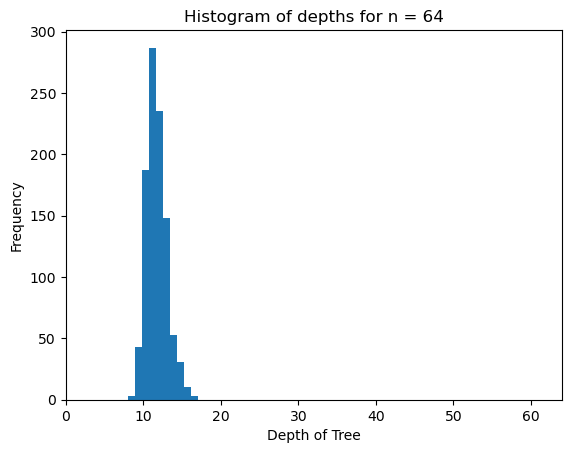

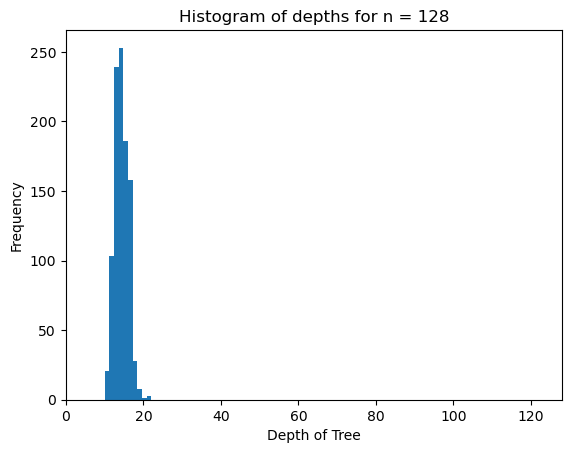

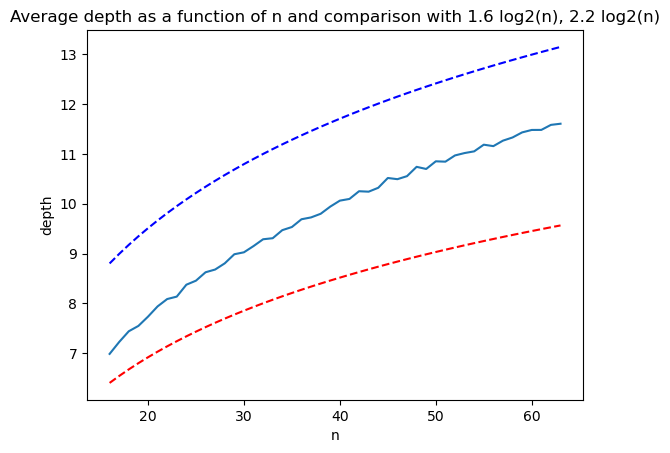

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import math 

(avg64, lst_of_results_64) = run_multiple_trials(64,1000)
plt.hist(lst_of_results_64)
plt.xlim(0,64)
plt.xlabel('Depth of Tree')
plt.ylabel('Frequency')
plt.title('Histogram of depths for n = 64')
print(f'Average depth for 64 = {avg64}')
assert avg64 <= 12 and avg64 >= 8

plt.figure()
(avg128, lst_of_results_128) = run_multiple_trials(128,1000)
print(f'Average depth for 128 = {avg128}')
assert avg128 <= 16 and avg128 >= 12


plt.hist(lst_of_results_128)
plt.xlim(0,128)
plt.xlabel('Depth of Tree')
plt.ylabel('Frequency')
plt.title('Histogram of depths for n = 128')

nmin=16
nmax=64

lst_of_average_depths = [ run_multiple_trials(j,1000)[0] for j in range(nmin,nmax)]
plt.figure()
l1 = plt.plot(range(nmin,nmax), lst_of_average_depths,label='Avg. Depth')
plt.xlabel('n')
plt.ylabel('depth')
l2 = plt.plot(range(nmin,nmax), [1.6* math.log(j)/math.log(2) for j in range(nmin,nmax)],'--r',label='1.6log2(n)')
l3 = plt.plot(range(nmin,nmax), [2.2* math.log(j)/math.log(2) for j in range(nmin,nmax)],'--b',label='2.2log2(n)')
#plt.legend(handles=[l1, l2, l3])
plt.title('Average depth as a function of n and comparison with 1.6 log2(n), 2.2 log2(n)')
print('Passed all tests -- 15 points')